# Exercise

We're now going to classify galaxy vs quasars in the Sloan Digital Sky Survey. This is one of the most famous example of machine-learning classification in astronomy.

#### Data

The dataset is at *solutions/galaxyquasar.csv*.

#### Tasks

- Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=0 and quasar=1.
- Classify the dataset against the target label.
- Try some of the classification methods we've seen so far and evaluate the performance using the ROC curve.
- Remember to split the dataset into training and validation...

#### Ideas

- Try using different colors (a subset of them first, than all together). Which is the most important feature?
- What are the colors that better satisfy or invalidate the "Naive" assumption of independence between the attributes?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=np.genfromtxt('/Users/beasa/Desktop/astrostatistics_bicocca_2024/solutions/galaxyquasar.csv', 
                   delimiter=',', names=True, usecols=(0, 1, 2, 3, 4, 6), dtype=float)

In [3]:
print(data[0])
print(data.dtype.names)
data

(18.97213, 18.53676, 18.5828, 18.34936, 18.29215, 0.5228189)
('u', 'g', 'r', 'i', 'z', 'z1')


array([(18.97213, 18.53676, 18.5828 , 18.34936, 18.29215, 0.5228189 ),
       (19.24592, 17.47646, 16.47817, 16.04472, 15.68851, 0.1228459 ),
       (19.43536, 17.70268, 16.91565, 16.58327, 16.39128, 0.        ),
       ...,
       (18.62718, 17.30876, 16.87371, 16.62399, 16.42296, 0.05442934),
       (19.5514 , 18.27711, 17.62101, 17.21947, 17.03347, 0.1125709 ),
       (18.80772, 17.75751, 17.405  , 17.2165 , 17.12295, 0.04365238)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('z1', '<f8')])

I define the arrays containing the elements in $data$ and I compute the colors. 

In [4]:
u = []
g = []
r = []
i = []
z = []
ug = []
gr = []
ri = []
iz = []

for j in range (0, len(data)):
    u.append(data[j][0])
    g.append(data[j][1])
    r.append(data[j][2])
    i.append(data[j][3])
    z.append(data[j][4])
    
    ug.append(u[j]-g[j])
    gr.append(g[j]-r[j])
    ri.append(r[j]-i[j])
    iz.append(i[j]-z[j])

Then, from $data$ I get the labels and I observe how many classes there are. As I can see, there are galaxies and quasars.

In [5]:
labels = np.genfromtxt('/Users/beasa/Desktop/astrostatistics_bicocca_2024/solutions/galaxyquasar.csv', 
                       delimiter=',', skip_header=1, usecols=5, dtype=str)  # column = 5: it is the one of the labels
labels

array(['QSO', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

In [6]:
np.unique(labels)

array(['GALAXY', 'QSO'], dtype='<U6')

In [7]:
u = np.array(u)
g = np.array(g)
r = np.array(r)
i = np.array(i)
z = np.array(z)
ug = np.array(ug)
gr = np.array(gr)
ri = np.array(ri)
iz = np.array(iz)

To simplify the procedure, I associate to all the objects 'GALAXY' the value $0$, and to the objects 'QSO' the value $1$.

In [8]:
newLabels = []

for k in range(0, len(labels)):
    if labels[k]=='GALAXY':
        newLabels.append(0)
    if labels[k]=='QSO':
        newLabels.append(1)

newLabels = np.array(newLabels)

I split the data set composed by the colors and the array of labels into training and validation sets. 

In [9]:
X = np.array([ug, gr, ri, iz]).T
y = np.copy(newLabels)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

##### Classification methods

I start with Gaussian Naive Bayes. Firstly, I initialize the methos, I train it, I compute the probabilities associated to the array $X\_val$ and I compute the false positive and true positive rates, which are the ones plotted for the ROC curve.

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

yProb_gnb = gnb.predict_proba(X_val)[:, 1]

fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_val, yProb_gnb)

I repeat the same procedure with respectively: Linear Discriminant Analysis, Quadratic Discriminant Analysis, Gaussian Mixture Model Classifier and K-Nearest Neighbor Classifier.

In [11]:
lda = LDA()
lda.fit(X_train, y_train)

yProb_lda = lda.predict_proba(X_val)[:, 1]

fpr_lda, tpr_lda, thresh_lda = roc_curve(y_val, yProb_lda)

In [12]:
qda = QDA()
qda.fit(X_train, y_train)

yProb_qda = qda.predict_proba(X_val)[:, 1]

fpr_qda, tpr_qda, thresh_qda = roc_curve(y_val, yProb_qda)

In [13]:
gmm = GMMBayes(n_components=2, random_state=42)
gmm.fit(X_train, y_train)

yProb_gmm = gmm.predict_proba(X_val)[:, 1]

fpr_gmm, tpr_gmm, thresh_gmm = roc_curve(y_val, yProb_gmm)

In [14]:
knc = KNeighborsClassifier(5)
knc.fit(X_train, y_train)

yProb_knc = knc.predict_proba(X_val)[:, 1]

fpr_knc, tpr_knc, thresh_knc = roc_curve(y_val, yProb_knc)

I plot the resulting ROC curves for the different classifier.

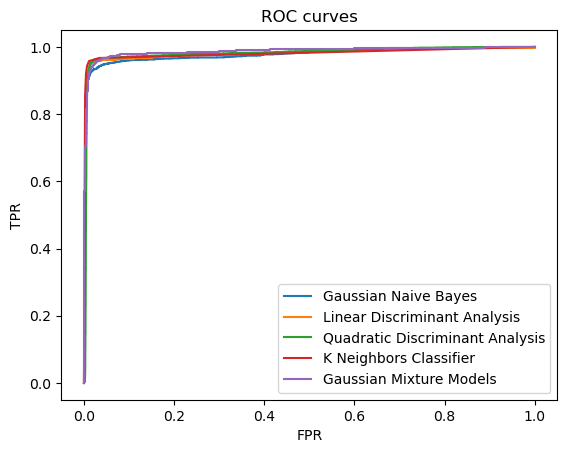

In [16]:
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes')
plt.plot(fpr_lda, tpr_lda, label='Linear Discriminant Analysis')
plt.plot(fpr_qda, tpr_qda, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc, tpr_knc, label='K Neighbors Classifier')
plt.plot(fpr_gmm, tpr_gmm, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

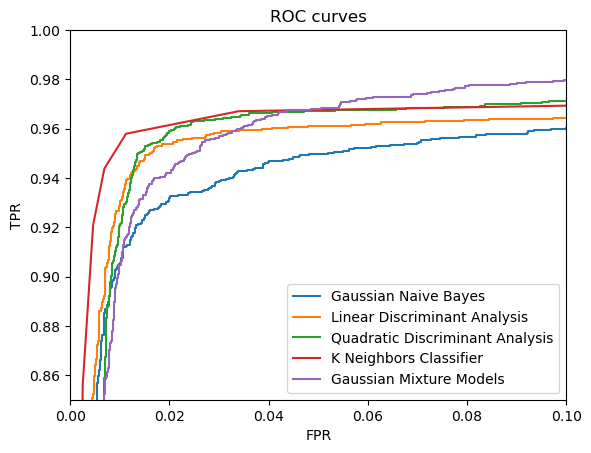

In [17]:
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes')
plt.plot(fpr_lda, tpr_lda, label='Linear Discriminant Analysis')
plt.plot(fpr_qda, tpr_qda, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc, tpr_knc, label='K Neighbors Classifier')
plt.plot(fpr_gmm, tpr_gmm, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves')
plt.xlim(0, 0.1)
plt.ylim(0.85, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

I want to try with different subsets of colors. To do that, I take away a color at a time and I compute the resulting ROC curves.

In [18]:
X1 = np.array([gr, ri, iz]).T

X1_train, X1_val, y1_train, y1_val = sklearn.model_selection.train_test_split(X1, y, test_size=0.30, random_state=42)

In [19]:
gnb.fit(X1_train, y1_train)
yProb_gnb1 = gnb.predict_proba(X1_val)[:, 1]
fpr_gnb1, tpr_gnb1, thresh_gnb1 = roc_curve(y1_val, yProb_gnb1)

lda.fit(X1_train, y1_train)
yProb_lda1 = lda.predict_proba(X1_val)[:, 1]
fpr_lda1, tpr_lda1, thresh_lda1 = roc_curve(y1_val, yProb_lda1)

qda.fit(X1_train, y1_train)
yProb_qda1 = qda.predict_proba(X1_val)[:, 1]
fpr_qda1, tpr_qda1, thresh_qda1 = roc_curve(y1_val, yProb_qda1)

gmm.fit(X1_train, y1_train)
yProb_gmm1 = gmm.predict_proba(X1_val)[:, 1]
fpr_gmm1, tpr_gmm1, thresh_gmm1 = roc_curve(y1_val, yProb_gmm1)

knc.fit(X1_train, y1_train)
yProb_knc1 = knc.predict_proba(X1_val)[:, 1]
fpr_knc1, tpr_knc1, thresh_knc1 = roc_curve(y1_val, yProb_knc1)

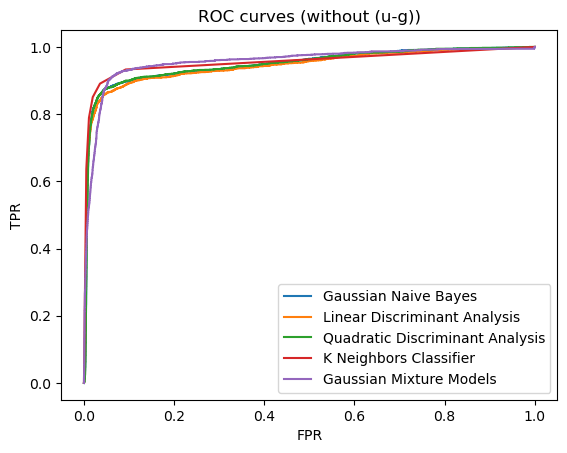

In [20]:
plt.plot(fpr_gnb1, tpr_gnb1, label='Gaussian Naive Bayes')
plt.plot(fpr_lda1, tpr_lda1, label='Linear Discriminant Analysis')
plt.plot(fpr_qda1, tpr_qda1, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc1, tpr_knc1, label='K Neighbors Classifier')
plt.plot(fpr_gmm1, tpr_gmm1, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (u-g))')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

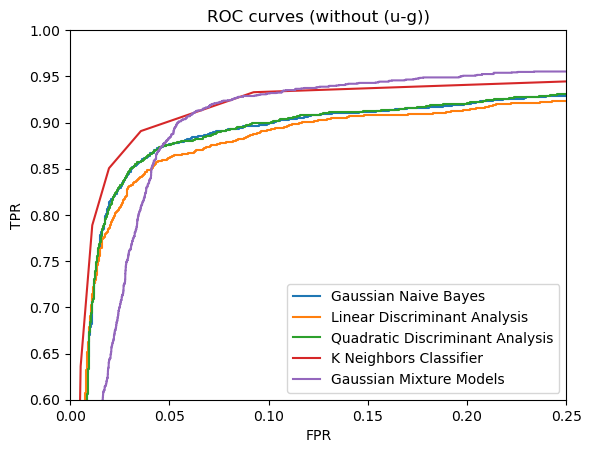

In [21]:
plt.plot(fpr_gnb1, tpr_gnb1, label='Gaussian Naive Bayes')
plt.plot(fpr_lda1, tpr_lda1, label='Linear Discriminant Analysis')
plt.plot(fpr_qda1, tpr_qda1, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc1, tpr_knc1, label='K Neighbors Classifier')
plt.plot(fpr_gmm1, tpr_gmm1, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (u-g))')
plt.xlim(0, 0.25)
plt.ylim(0.6, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [22]:
X2 = np.array([ug, ri, iz]).T

X2_train, X2_val, y2_train, y2_val = sklearn.model_selection.train_test_split(X2, y, test_size=0.30, random_state=42)

In [23]:
gnb.fit(X2_train, y2_train)
yProb_gnb2 = gnb.predict_proba(X2_val)[:, 1]
fpr_gnb2, tpr_gnb2, thresh_gnb2 = roc_curve(y2_val, yProb_gnb2)

lda.fit(X2_train, y2_train)
yProb_lda2 = lda.predict_proba(X2_val)[:, 1]
fpr_lda2, tpr_lda2, thresh_lda2 = roc_curve(y2_val, yProb_lda2)

qda.fit(X2_train, y2_train)
yProb_qda2 = qda.predict_proba(X2_val)[:, 1]
fpr_qda2, tpr_qda2, thresh_qda2 = roc_curve(y2_val, yProb_qda2)

gmm.fit(X2_train, y2_train)
yProb_gmm2 = gmm.predict_proba(X2_val)[:, 1]
fpr_gmm2, tpr_gmm2, thresh_gmm2 = roc_curve(y2_val, yProb_gmm2)

knc.fit(X2_train, y2_train)
yProb_knc2 = knc.predict_proba(X2_val)[:, 1]
fpr_knc2, tpr_knc2, thresh_knc2 = roc_curve(y2_val, yProb_knc2)

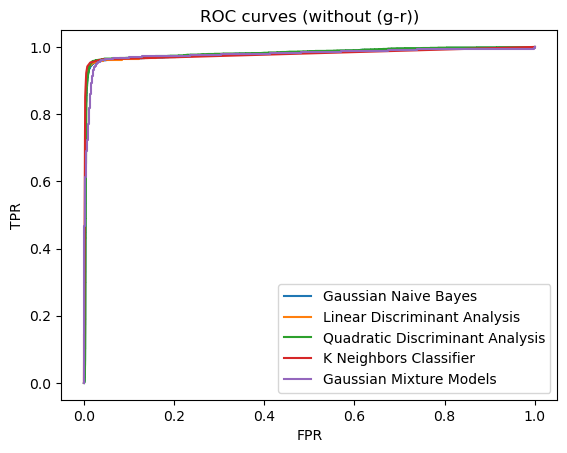

In [24]:
plt.plot(fpr_gnb2, tpr_gnb2, label='Gaussian Naive Bayes')
plt.plot(fpr_lda2, tpr_lda2, label='Linear Discriminant Analysis')
plt.plot(fpr_qda2, tpr_qda2, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc2, tpr_knc2, label='K Neighbors Classifier')
plt.plot(fpr_gmm2, tpr_gmm2, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (g-r))')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

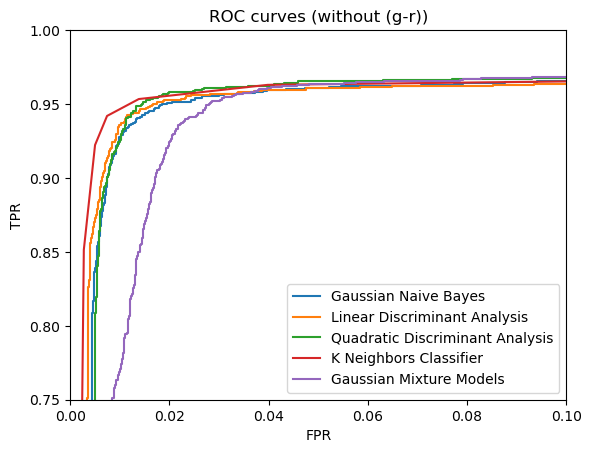

In [25]:
plt.plot(fpr_gnb2, tpr_gnb2, label='Gaussian Naive Bayes')
plt.plot(fpr_lda2, tpr_lda2, label='Linear Discriminant Analysis')
plt.plot(fpr_qda2, tpr_qda2, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc2, tpr_knc2, label='K Neighbors Classifier')
plt.plot(fpr_gmm2, tpr_gmm2, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (g-r))')
plt.xlim(0, 0.1)
plt.ylim(0.75, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [26]:
X3 = np.array([ug, gr, iz]).T

X3_train, X3_val, y3_train, y3_val = sklearn.model_selection.train_test_split(X3, y, test_size=0.30, random_state=42)

In [27]:
gnb.fit(X3_train, y3_train)
yProb_gnb3 = gnb.predict_proba(X3_val)[:, 1]
fpr_gnb3, tpr_gnb3, thresh_gnb3 = roc_curve(y3_val, yProb_gnb3)

lda.fit(X3_train, y3_train)
yProb_lda3 = lda.predict_proba(X3_val)[:, 1]
fpr_lda3, tpr_lda3, thresh_lda3 = roc_curve(y3_val, yProb_lda3)

qda.fit(X3_train, y3_train)
yProb_qda3 = qda.predict_proba(X3_val)[:, 1]
fpr_qda3, tpr_qda3, thresh_qda3 = roc_curve(y3_val, yProb_qda3)

gmm.fit(X3_train, y3_train)
yProb_gmm3 = gmm.predict_proba(X3_val)[:, 1]
fpr_gmm3, tpr_gmm3, thresh_gmm3 = roc_curve(y3_val, yProb_gmm3)

knc.fit(X3_train, y3_train)
yProb_knc3 = knc.predict_proba(X3_val)[:, 1]
fpr_knc3, tpr_knc3, thresh_knc3 = roc_curve(y3_val, yProb_knc3)

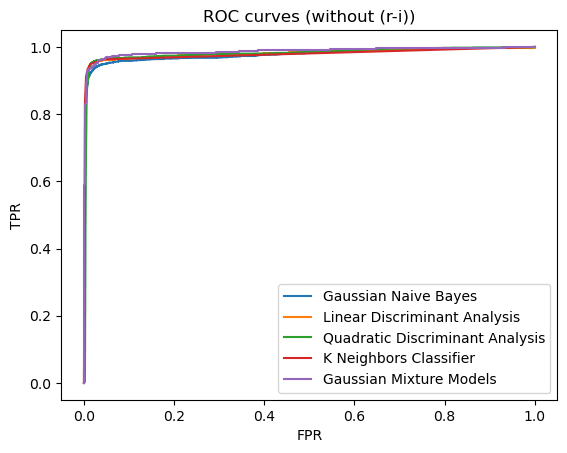

In [28]:
plt.plot(fpr_gnb3, tpr_gnb3, label='Gaussian Naive Bayes')
plt.plot(fpr_lda3, tpr_lda3, label='Linear Discriminant Analysis')
plt.plot(fpr_qda3, tpr_qda3, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc3, tpr_knc3, label='K Neighbors Classifier')
plt.plot(fpr_gmm3, tpr_gmm3, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (r-i))')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

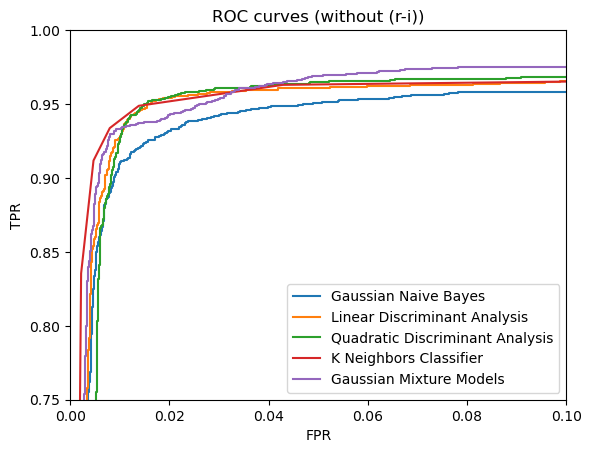

In [29]:
plt.plot(fpr_gnb3, tpr_gnb3, label='Gaussian Naive Bayes')
plt.plot(fpr_lda3, tpr_lda3, label='Linear Discriminant Analysis')
plt.plot(fpr_qda3, tpr_qda3, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc3, tpr_knc3, label='K Neighbors Classifier')
plt.plot(fpr_gmm3, tpr_gmm3, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (r-i))')
plt.xlim(0, 0.1)
plt.ylim(0.75, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [30]:
X4 = np.array([ug, gr, ri]).T

X4_train, X4_val, y4_train, y4_val = sklearn.model_selection.train_test_split(X4, y, test_size=0.30, random_state=42)

In [31]:
gnb.fit(X4_train, y4_train)
yProb_gnb4 = gnb.predict_proba(X4_val)[:, 1]
fpr_gnb4, tpr_gnb4, thresh_gnb4 = roc_curve(y4_val, yProb_gnb4)

lda.fit(X4_train, y4_train)
yProb_lda4 = lda.predict_proba(X4_val)[:, 1]
fpr_lda4, tpr_lda4, thresh_lda4 = roc_curve(y4_val, yProb_lda4)

qda.fit(X4_train, y4_train)
yProb_qda4 = qda.predict_proba(X4_val)[:, 1]
fpr_qda4, tpr_qda4, thresh_qda4 = roc_curve(y4_val, yProb_qda4)

gmm.fit(X4_train, y4_train)
yProb_gmm4 = gmm.predict_proba(X4_val)[:, 1]
fpr_gmm4, tpr_gmm4, thresh_gmm4 = roc_curve(y4_val, yProb_gmm4)

knc.fit(X4_train, y4_train)
yProb_knc4 = knc.predict_proba(X4_val)[:, 1]
fpr_knc4, tpr_knc4, thresh_knc4 = roc_curve(y4_val, yProb_knc4)

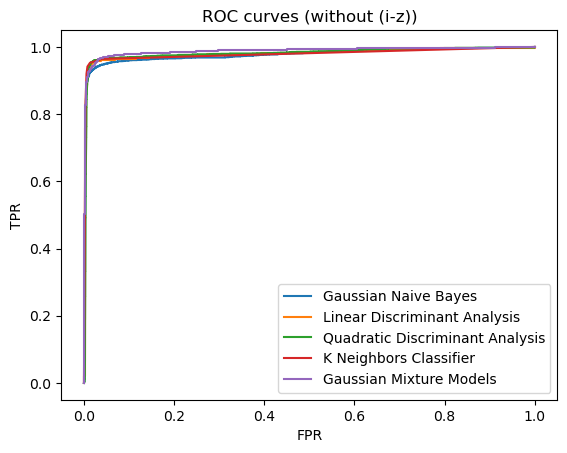

In [32]:
plt.plot(fpr_gnb4, tpr_gnb4, label='Gaussian Naive Bayes')
plt.plot(fpr_lda4, tpr_lda4, label='Linear Discriminant Analysis')
plt.plot(fpr_qda4, tpr_qda4, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc4, tpr_knc4, label='K Neighbors Classifier')
plt.plot(fpr_gmm4, tpr_gmm4, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (i-z))')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

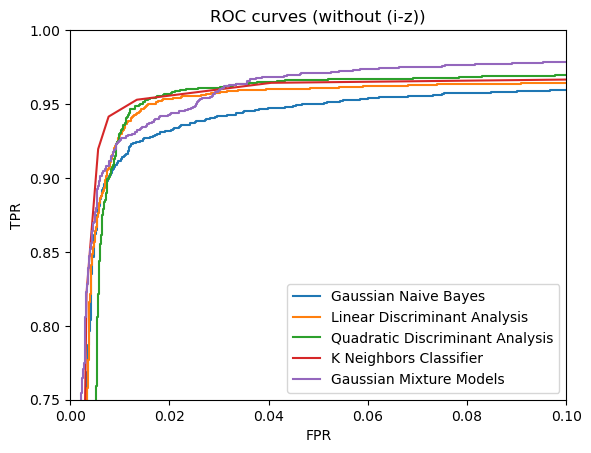

In [33]:
plt.plot(fpr_gnb4, tpr_gnb4, label='Gaussian Naive Bayes')
plt.plot(fpr_lda4, tpr_lda4, label='Linear Discriminant Analysis')
plt.plot(fpr_qda4, tpr_qda4, label='Quadratic Discriminant Analysis')
plt.plot(fpr_knc4, tpr_knc4, label='K Neighbors Classifier')
plt.plot(fpr_gmm4, tpr_gmm4, label='Gaussian Mixture Models')
plt.legend()
plt.title('ROC curves (without (i-z))')
plt.xlim(0, 0.1)
plt.ylim(0.75, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

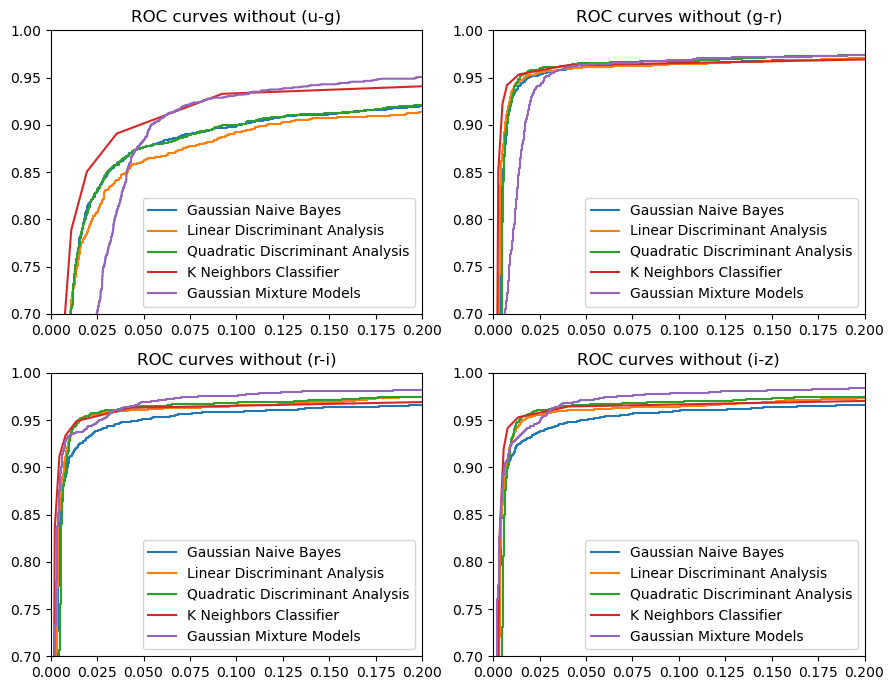

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].set_title('ROC curves without (u-g)')
ax[0, 0].plot(fpr_gnb1, tpr_gnb1, label='Gaussian Naive Bayes')
ax[0, 0].plot(fpr_lda1, tpr_lda1, label='Linear Discriminant Analysis')
ax[0, 0].plot(fpr_qda1, tpr_qda1, label='Quadratic Discriminant Analysis')
ax[0, 0].plot(fpr_knc1, tpr_knc1, label='K Neighbors Classifier')
ax[0, 0].plot(fpr_gmm1, tpr_gmm1, label='Gaussian Mixture Models')
ax[0, 0].legend()
ax[0, 0].set_xlim(0, 0.2)
ax[0, 0].set_ylim(0.7, 1)

ax[0, 1].set_title('ROC curves without (g-r)')
ax[0, 1].plot(fpr_gnb2, tpr_gnb2, label='Gaussian Naive Bayes')
ax[0, 1].plot(fpr_lda2, tpr_lda2, label='Linear Discriminant Analysis')
ax[0, 1].plot(fpr_qda2, tpr_qda2, label='Quadratic Discriminant Analysis')
ax[0, 1].plot(fpr_knc2, tpr_knc2, label='K Neighbors Classifier')
ax[0, 1].plot(fpr_gmm2, tpr_gmm2, label='Gaussian Mixture Models')
ax[0, 1].legend()
ax[0, 1].set_xlim(0, 0.2)
ax[0, 1].set_ylim(0.7, 1)

ax[1, 0].set_title('ROC curves without (r-i)')
ax[1, 0].plot(fpr_gnb3, tpr_gnb3, label='Gaussian Naive Bayes')
ax[1, 0].plot(fpr_lda3, tpr_lda3, label='Linear Discriminant Analysis')
ax[1, 0].plot(fpr_qda3, tpr_qda3, label='Quadratic Discriminant Analysis')
ax[1, 0].plot(fpr_knc3, tpr_knc3, label='K Neighbors Classifier')
ax[1, 0].plot(fpr_gmm3, tpr_gmm3, label='Gaussian Mixture Models')
ax[1, 0].legend()
ax[1, 0].set_xlim(0, 0.2)
ax[1, 0].set_ylim(0.7, 1)

ax[1, 1].set_title('ROC curves without (i-z)')
ax[1, 1].plot(fpr_gnb4, tpr_gnb4, label='Gaussian Naive Bayes')
ax[1, 1].plot(fpr_lda4, tpr_lda4, label='Linear Discriminant Analysis')
ax[1, 1].plot(fpr_qda4, tpr_qda4, label='Quadratic Discriminant Analysis')
ax[1, 1].plot(fpr_knc4, tpr_knc4, label='K Neighbors Classifier')
ax[1, 1].plot(fpr_gmm4, tpr_gmm4, label='Gaussian Mixture Models')
ax[1, 1].legend()
ax[1, 1].set_xlim(0, 0.2)
ax[1, 1].set_ylim(0.7, 1)

plt.tight_layout()
plt.show()